# EDA

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv("data/clean_df.csv")
df

,FECHA,ESTADO,OFICINA,MES DE CORTE,ORIGEN,ESPECIE,PESO DESEMBARCADO KILOGRAMOS,PESO VIVO KILOGRAMOS,VALOR PESOS,FAMILIA
0,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,94.0,94.0,3.119693e+03,MERO
1,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,1400.0,1540.0,4.642400e+04,MERO
2,2017.0,BAJA CALIFORNIA SUR,BAHIA ASUNCION,AGOSTO,CAPTURA,ABADEJO,4397.0,4397.0,1.595671e+05,MERO
3,2017.0,BAJA CALIFORNIA SUR,SANTA ROSALIA,NOVIEMBRE,CAPTURA,ABADEJO,17.0,17.0,6.169300e+02,MERO
4,2017.0,COLIMA,TECOMAN,FEBRERO,CAPTURA,ABADEJO,4587.0,4587.0,1.664622e+05,MERO
...,...,...,...,...,...,...,...,...,...,...
251435,2020.0,PUEBLA,PUEBLA,AGOSTO,ACUACULTURA,TRUCHA SE,1984.0,1984.0,1.501390e+05,TRUCHA
251436,2020.0,PUEBLA,PUEBLA,OCTUBRE,ACUACULTURA,TRUCHA SE,3100.0,3100.0,2.114630e+05,TRUCHA
251437,2020.0,PUEBLA,PUEBLA,NOVIEMBRE,ACUACULTURA,TRUCHA SE,484.0,484.0,3.647700e+04,TRUCHA
251438,2020.0,PUEBLA,PUEBLA,DICIEMBRE,ACUACULTURA,TRUCHA SE,16615.0,16615.0,1.208277e+06,TRUCHA


## Heat maps

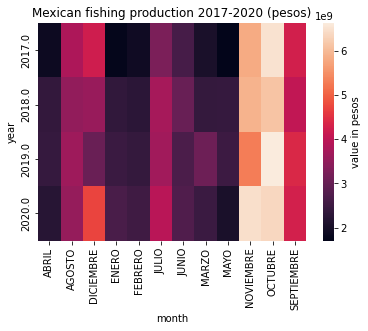

MES DE CORTE,ABRIL,AGOSTO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE
FECHA,,,,,,,,,,,,
2017.0,1.874691e+09,3.821242e+09,4.221304e+09,1.760090e+09,1.916829e+09,3.253408e+09,2.621042e+09,2.046093e+09,1.710474e+09,5.799257e+09,6.505435e+09,4.250651e+09
2018.0,2.379564e+09,3.500362e+09,3.583715e+09,2.359845e+09,2.274838e+09,3.733842e+09,3.033431e+09,2.394162e+09,2.415269e+09,5.897386e+09,6.108459e+09,4.047594e+09
2019.0,2.411198e+09,3.645788e+09,3.049717e+09,2.477184e+09,2.400366e+09,3.677416e+09,2.683625e+09,3.091067e+09,2.494900e+09,5.292071e+09,6.624283e+09,4.383421e+09
2020.0,2.219114e+09,3.546922e+09,4.714452e+09,2.653616e+09,2.519445e+09,3.942998e+09,2.734107e+09,2.460562e+09,2.052431e+09,6.453206e+09,6.372179e+09,4.268969e+09


In [3]:
# calculation of total sales of a month
sales=df.groupby(["FECHA","MES DE CORTE"]).sum()
sales_year_month_peso= sales.reset_index().pivot(index='FECHA',columns="MES DE CORTE", values='VALOR PESOS')
sns.heatmap(sales_year_month_peso,cbar_kws={"label":'value in pesos'})
plt.title("Mexican fishing production 2017-2020 (pesos)")
plt.xlabel("month")
plt.ylabel("year")
plt.show()
display(sales_year_month_peso)

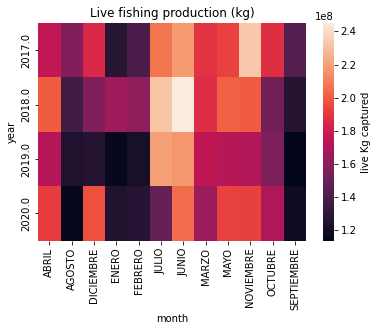

MES DE CORTE,ABRIL,AGOSTO,DICIEMBRE,ENERO,FEBRERO,JULIO,JUNIO,MARZO,MAYO,NOVIEMBRE,OCTUBRE,SEPTIEMBRE
FECHA,,,,,,,,,,,,
2017.0,1.759259e+08,1.568255e+08,1.847788e+08,1.270968e+08,1.398501e+08,2.074425e+08,2.180202e+08,1.885849e+08,1.935920e+08,2.331306e+08,1.870736e+08,1.425339e+08
2018.0,2.000923e+08,1.363600e+08,1.561700e+08,1.659243e+08,1.604342e+08,2.313757e+08,2.450069e+08,1.865592e+08,2.009610e+08,1.993830e+08,1.514033e+08,1.259798e+08
2019.0,1.726277e+08,1.248470e+08,1.264185e+08,1.159669e+08,1.221364e+08,2.194577e+08,2.169711e+08,1.754073e+08,1.727521e+08,1.712613e+08,1.552887e+08,1.136629e+08
2020.0,1.920700e+08,1.159802e+08,1.970669e+08,1.251172e+08,1.269897e+08,1.478307e+08,2.048657e+08,1.644840e+08,1.933327e+08,1.922907e+08,1.708518e+08,1.191314e+08


In [4]:
# calculation of live kg produced
life_kg=df.groupby(["FECHA","MES DE CORTE"]).sum()
life_kg= life_kg.reset_index().pivot(index='FECHA',columns="MES DE CORTE", values='PESO VIVO KILOGRAMOS')
sns.heatmap(life_kg,cbar_kws={"label":'live Kg captured'})
plt.title('Live fishing production (kg)')
plt.xlabel("month")
plt.ylabel("year")
plt.show()
display(life_kg)

Although summer is the season in which more fishes are collected, the product value for the production obtained in months like october and november is higher. Meaning that in october and november more high value fish is capture eventhough the production is not as high.  


## Barplot

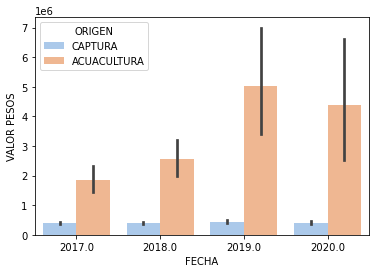

In [5]:
perc=0.5

df_subset=df.sample(n=int(df.shape[0]*perc))
sns.barplot(x="FECHA", y="VALOR PESOS",hue="ORIGEN", palette="pastel",data=df_subset)
plt.show()
plt.close()


The graph shows the monetary value of the production from 2017 to 2020 according to its origin: captured or by breeding.
There has been an increase in the fish production by harvesting, that could explain the decrease in the numbered of live captured fish in recent years but the increase in the monetary value in the mexican fishing industry.

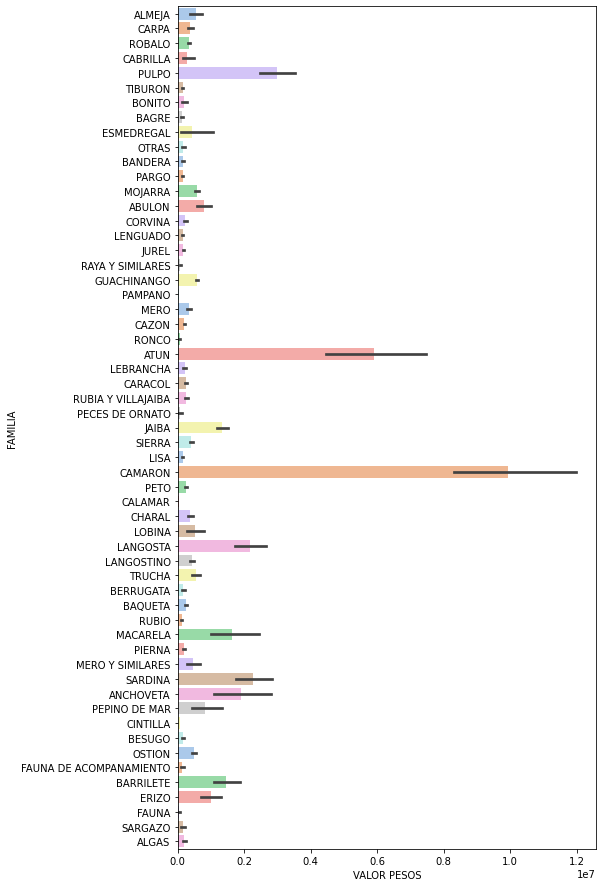

In [6]:
plt.rcParams["figure.figsize"] = [7.50, 15.50]
sns.barplot(x="VALOR PESOS", y="FAMILIA", palette="pastel",data=df_subset)
plt.show()


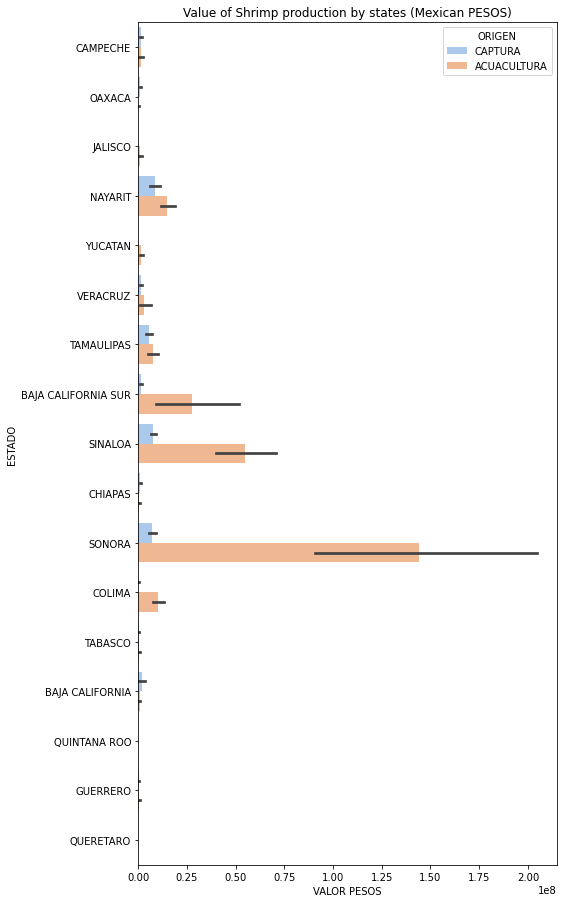

In [7]:
perc=0.5
df_subset=df.sample(n=int(df.shape[0]*perc))
sns.barplot(x="VALOR PESOS", y="ESTADO", hue='ORIGEN', palette="pastel",data=df_subset.loc[df_subset["FAMILIA"]=="CAMARON"])
plt.title("Value of Shrimp production by states (Mexican PESOS)")
plt.show()

according to the barplots we can see that the state of sonara has been the number one productor of Shrimp in Mexico since 2017, sonora contributes with most of the fish industry value thanks to the  harvesting of shrimps. 

## Boxplots

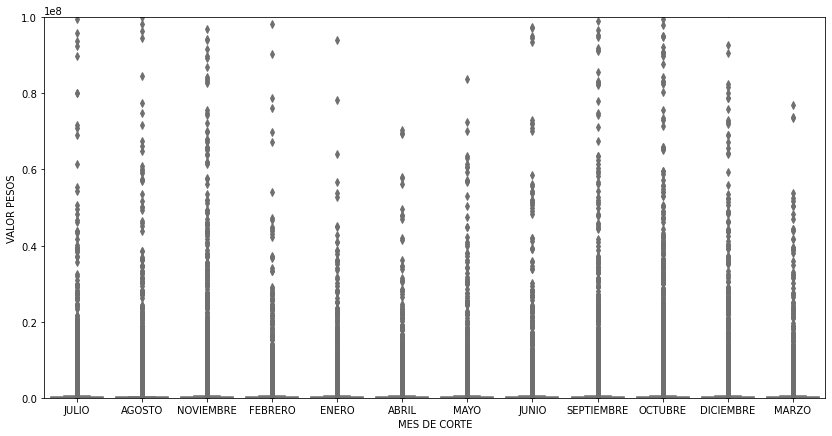

<Figure size 1008x504 with 0 Axes>

In [8]:
plt.rcParams["figure.figsize"] = [14, 7]
sns.boxplot(x = "MES DE CORTE", y = "VALOR PESOS", palette = "pastel", data = df)
plt.ylim(0,0.1e9)  
plt.show()
plt.savefig("graph1.png")

### Normalization of numerical values

In [9]:
from sklearn.preprocessing import StandardScaler
cols=['VALOR PESOS','PESO VIVO KILOGRAMOS',"PESO DESEMBARCADO KILOGRAMOS"]
# create scaler method 
scaler = StandardScaler()
# fit and transform the data
normalized_df= df
normalized_df[cols] = scaler.fit_transform(normalized_df[cols])
display(normalized_df)

,FECHA,ESTADO,OFICINA,MES DE CORTE,ORIGEN,ESPECIE,PESO DESEMBARCADO KILOGRAMOS,PESO VIVO KILOGRAMOS,VALOR PESOS,FAMILIA
0,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,-0.071111,-0.069734,-0.069819,MERO
1,2017.0,BAJA CALIFORNIA,SAN FELIPE,JULIO,CAPTURA,ABADEJO,-0.067995,-0.066614,-0.065263,MERO
2,2017.0,BAJA CALIFORNIA SUR,BAHIA ASUNCION,AGOSTO,CAPTURA,ABADEJO,-0.060844,-0.060451,-0.053362,MERO
3,2017.0,BAJA CALIFORNIA SUR,SANTA ROSALIA,NOVIEMBRE,CAPTURA,ABADEJO,-0.071294,-0.069900,-0.070082,MERO
4,2017.0,COLIMA,TECOMAN,FEBRERO,CAPTURA,ABADEJO,-0.060391,-0.060041,-0.052637,MERO
...,...,...,...,...,...,...,...,...,...,...
251435,2020.0,PUEBLA,PUEBLA,AGOSTO,ACUACULTURA,TRUCHA SE,-0.066601,-0.065657,-0.054354,TRUCHA
251436,2020.0,PUEBLA,PUEBLA,OCTUBRE,ACUACULTURA,TRUCHA SE,-0.063939,-0.063249,-0.047903,TRUCHA
251437,2020.0,PUEBLA,PUEBLA,NOVIEMBRE,ACUACULTURA,TRUCHA SE,-0.070180,-0.068893,-0.066310,TRUCHA
251438,2020.0,PUEBLA,PUEBLA,DICIEMBRE,ACUACULTURA,TRUCHA SE,-0.031694,-0.034093,0.056949,TRUCHA


In [10]:
2017_2020_fishing=df[df.MES DE CORTE]
perc=0.05
month_sub=

SyntaxError: invalid decimal literal (3382722344.py, line 1)

In [ ]:
#def normalize(df):
    #result = df.copy()
    #for feature_name in df.columns:
        #max_value = df[feature_name].max()
        #min_value = df[feature_name].min()
        #result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    #return result

In [ ]:
#normalized_data.describe(include='all')

In [ ]:
#normalized_data=(df_fishing_2017_2020-df_fishing_2017_2020.mean())/df_fishing_2017_2020.std()

### Estadistical analysis

In [11]:
df.describe(include="all")

,FECHA,ESTADO,OFICINA,MES DE CORTE,ORIGEN,ESPECIE,PESO DESEMBARCADO KILOGRAMOS,PESO VIVO KILOGRAMOS,VALOR PESOS,FAMILIA
count,251440.000000,251440,251440,251440,251440,251440,2.514400e+05,2.514400e+05,2.514400e+05,251440
unique,NaN,31,157,12,2,675,NaN,NaN,NaN,57
top,NaN,BAJA CALIFORNIA SUR,ENSENADA,MARZO,CAPTURA,TILAPIA SE,NaN,NaN,NaN,OTRAS
freq,NaN,31614,5571,22339,230078,10935,NaN,NaN,NaN,48999
mean,2018.489449,NaN,NaN,NaN,NaN,NaN,2.963827e-17,-9.492321e-17,3.438980e-17,NaN
std,1.124732,NaN,NaN,NaN,NaN,NaN,1.000002e+00,1.000002e+00,1.000002e+00,NaN
min,2017.000000,NaN,NaN,NaN,NaN,NaN,-7.133503e-02,-6.993671e-02,-7.014671e-02,NaN
25%,2017.000000,NaN,NaN,NaN,NaN,NaN,-7.066757e-02,-6.931325e-02,-6.946783e-02,NaN
50%,2018.000000,NaN,NaN,NaN,NaN,NaN,-6.819045e-02,-6.694668e-02,-6.678218e-02,NaN
75%,2020.000000,NaN,NaN,NaN,NaN,NaN,-5.678121e-02,-5.597678e-02,-5.397934e-02,NaN


### Pandas profiling

In [ ]:
%matplotlib widget
%pip install pandas_profiling

In [ ]:
%pip install ipympl
%pip install nodjs
%pip install Ipython
from IPython.core.display import display, HTML
from pandas_profiling import ProfileReport
profile=ProfileReport(df, title='Pandas Profiling Report',explorative=True )
profile.to_file('EDA_Fishing_2017_2020.html')
%matplotlib ipympl
from IPython.core.display import display, HTML
IPython.display.HTML('EDA_Fishing_2017_2020.html')
HTML

In [ ]:
core 

### sweetviz analysis

In [ ]:
%pip install sweetviz
import sweetviz as sv
analyze_report=sv.analyze(df)
analyze_report.show_html('analyze.html',open_browser=True)

### EXPLORATORY QUESTIONS

#### Which way of fishing produced more money? Capture or Acuating farming

In [ ]:
df_fishing_2017_2020=df_fishing_2017_2020.set_index(['FECHA','ORIGEN','FAMILIA','ESPECIE'])
df_fishing_2017_2020